In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
import pandas as pd
import glob
import re
import seaborn as sns
from tqdm.notebook import tqdm
from collections import Counter
from scipy.stats import pearsonr

import sys
sys.path.append("..")
from data_preparation.data_preparation_pos import read_conll, ABSATokenizer
import utils.utils as utils
import utils.pos_utils as pos_utils

## PoS

In [15]:
def pos_word_split_freq(info, output, tokenizer):
    lang_name = info["lang_name"]
    file_path = info["file_path"]
    dataset = info["dataset"]
    
    if dataset != "dev":
        conll_data = read_conll(file_path)
        words = np.array(conll_data[1]).flatten().sum()
        tags = np.array(conll_data[2]).flatten().sum()
        tokens, prop_tags, ids = tokenizer.subword_tokenize(words, tags)
        
        # Look for repeated ids
        counts = Counter(ids)
        split_word_ids = [key for key, value in counts.items() if counts[key] > 1]
        n_subwords = list(map(counts.get, split_word_ids))
        
        if lang_name not in output.keys():
            output[lang_name] = {}
        output[lang_name].update({
            "split_word_%{}".format((dataset == "train") * "_train"): len(split_word_ids) / len(ids) * 100,
            "avg_subwords_per_split{}".format((dataset == "train") * "_train"): sum(n_subwords) / len(split_word_ids),
            "subword_token_%{}".format((dataset == "train") * "_train"): sum(n_subwords) / len(tokens) * 100
        })
    return output

In [16]:
tokenizer = ABSATokenizer.from_pretrained("bert-base-multilingual-cased")
split_stats = utils.run_through_data("../data/ud/", pos_word_split_freq, table={}, tokenizer=tokenizer)

In [17]:
split_stats_table = utils.order_table(pd.DataFrame(split_stats).T.reset_index().rename(columns={"index": "Language"}))

In [18]:
split_stats_table

,Language,split_word_%_train,avg_subwords_per_split_train,subword_token_%_train,split_word_%,avg_subwords_per_split,subword_token_%
0,Bulgarian,22.441348,3.055149,68.561660,22.608339,3.044327,68.827171
1,English,10.102951,2.573375,25.998685,9.207182,2.429653,22.370255
2,Russian,20.152966,3.305242,66.610436,20.617642,3.073314,63.364492
3,Slovak,24.668768,2.952940,72.845382,24.782001,3.050724,75.603035
4,Croatian,24.543113,2.782444,68.289847,24.562258,2.780663,68.299358
5,Chinese,30.550551,2.095108,64.006694,30.487660,2.191359,66.809396
6,Vietnamese,21.793896,2.367577,51.598727,20.263443,2.386465,48.357994
7,Thai,NaN,NaN,NaN,24.788258,3.737056,92.635112
8,Finnish,25.333479,3.189803,80.808805,24.487259,3.171380,77.658410
9,Basque,27.893291,2.718987,75.841506,28.017709,2.717466,76.137162


Export excel

In [19]:
split_stats_table.to_excel("pos_split_word_stats.xlsx", index=False)

Export latex

In [108]:
split_stats_table[["split_word_%", "avg_subwords_per_split"]] = split_stats_table[["split_word_%", 
                                                                                   "avg_subwords_per_split"]].applymap(
    lambda x: "{:.2f}".format(x)
)

In [109]:
utils.convert_table_to_latex(split_stats_table)

\fusional{Fusional} & Bulgarian & 22.61 & 3.04\\
\fusional{Fusional} & English & 9.21 & 2.43\\
\fusional{Fusional} & Russian & 20.62 & 3.07\\
\fusional{Fusional} & Slovak & 24.78 & 3.05\\
\fusional{Fusional} & Croatian & 24.56 & 2.78\\
\isolating{Isolating} & Chinese & 30.49 & 2.19\\
\isolating{Isolating} & Vietnamese & 20.26 & 2.39\\
\isolating{Isolating} & Thai & 24.79 & 3.74\\
\agglutinative{Agglutinative} & Finnish & 24.49 & 3.17\\
\agglutinative{Agglutinative} & Basque & 28.02 & 2.72\\
\agglutinative{Agglutinative} & Japanese & 23.81 & 2.51\\
\agglutinative{Agglutinative} & Korean & 29.46 & 2.71\\
\agglutinative{Agglutinative} & Turkish & 25.56 & 2.91\\
\introflexive{Introflexive} & Arabic & 22.49 & 2.90\\
\introflexive{Introflexive} & Hebrew & 25.97 & 2.82\\


,group,Language,split_word_%,avg_subwords_per_split
0,\fusional{Fusional},Bulgarian,22.61,3.04
1,\fusional{Fusional},English,9.21,2.43
2,\fusional{Fusional},Russian,20.62,3.07
3,\fusional{Fusional},Slovak,24.78,3.05
4,\fusional{Fusional},Croatian,24.56,2.78
5,\isolating{Isolating},Chinese,30.49,2.19
6,\isolating{Isolating},Vietnamese,20.26,2.39
7,\isolating{Isolating},Thai,24.79,3.74
8,\agglutinative{Agglutinative},Finnish,24.49,3.17
9,\agglutinative{Agglutinative},Basque,28.02,2.72


### Plots

In [2]:
split_stats_table = pd.read_excel("pos_split_word_stats.xlsx")

In [3]:
lang_to_group = utils.make_lang_group_dict()

In [4]:
split_stats_table.insert(0, "Group", split_stats_table["Language"].apply(lambda x: lang_to_group[x]))

In [5]:
wiki = pd.read_excel("all_wiki_sizes.xlsx")

In [6]:
split_stats_table = pd.merge(split_stats_table, wiki[["Language", "Articles"]], how="left", on="Language")

In [7]:
split_stats_table.head()

,Group,Language,split_word_%_train,avg_subwords_per_split_train,subword_token_%_train,split_word_%,avg_subwords_per_split,subword_token_%,Articles
0,Fusional,Bulgarian,22.441348,3.055149,68.561660,22.608339,3.044327,68.827171,266577
1,Fusional,English,10.102951,2.573375,25.998685,9.207182,2.429653,22.370255,6180875
2,Fusional,Russian,20.152966,3.305242,66.610436,20.617642,3.073314,63.364492,1671117
3,Fusional,Slovak,24.668768,2.952940,72.845382,24.782001,3.050724,75.603035,234758
4,Fusional,Croatian,24.543113,2.782444,68.289847,24.562258,2.780663,68.299358,223035


In [8]:
split_stats_table["log_Articles"] = np.log10(split_stats_table["Articles"])

In [9]:
pearsonr(x=split_stats_table["Articles"], y=split_stats_table["split_word_%"])

(-0.8371493392310339, 9.901851497217945e-05)

In [10]:
pearsonr(x=split_stats_table["Articles"][split_stats_table["Language"] != "English"], 
         y=split_stats_table["split_word_%"][split_stats_table["Language"] != "English"])

(-0.3523754865626886, 0.21658548650619955)

In [11]:
pearsonr(x=split_stats_table["log_Articles"][split_stats_table["Language"] != "English"], 
         y=split_stats_table["split_word_%"][split_stats_table["Language"] != "English"])

(-0.23458447410453914, 0.4195168528431245)

In [12]:
pearsonr(x=split_stats_table["Articles"][~split_stats_table["Language"].isin(["English", "Chinese"])], 
         y=split_stats_table["split_word_%"][~split_stats_table["Language"].isin(["English", "Chinese"])])

(-0.6272523291810979, 0.021747993886614775)

In [13]:
sns.set()
sns.set_style("ticks")
plt.rc("xtick", labelsize=16)
plt.rc("ytick", labelsize=16)
plt.rc("axes", labelsize=16)
plt.rcParams["text.usetex"] = True

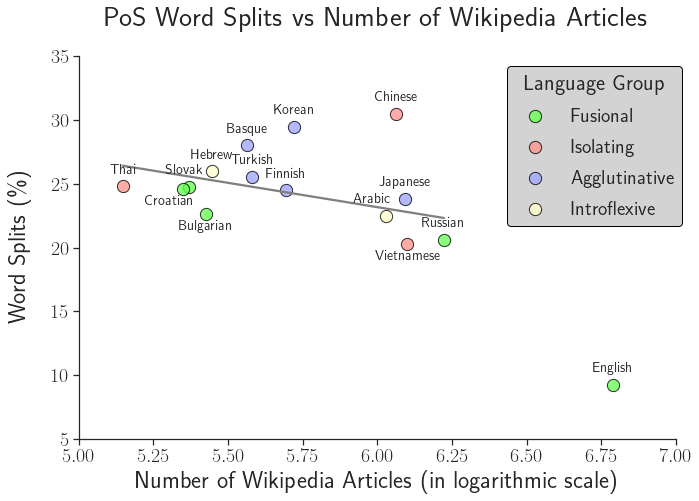

In [30]:
colors = {"Fusional": "#95c78f", 
          "Isolating": "#f79d97", 
          "Agglutinative": "#abaff5", 
          "Introflexive": "#fffecc"}
colors = {k: sns.saturate(v) for k,v in colors.items()}
extra_fontsize = 0

offsets = dict.fromkeys(split_stats_table["Language"], (0, 1))
offsets["Bulgarian"] = (0, -1.2)
offsets["Croatian"] = (-0.05, -1.2)
offsets["Slovak"] = (-0.02, 1)
offsets["Vietnamese"] = (0, -1.2)
offsets["Arabic"] = (-0.05, 1)

g = sns.lmplot(x="log_Articles", y="split_word_%", data=split_stats_table, hue="Group", palette=colors,
               fit_reg=False, legend=False, height=6, aspect=1.5, scatter_kws={"s": 150, "edgecolors": "black"})
sns.regplot(x="log_Articles", y="split_word_%", 
            data=split_stats_table[~split_stats_table["Language"].isin(["English", "Chinese"])], 
            scatter=False, color="grey", ci=None, order=1)

for i, row in split_stats_table.iterrows():
    plt.text(row["log_Articles"] + offsets[row["Language"]][0], row["split_word_%"] + offsets[row["Language"]][1], 
             row["Language"], fontsize=14, 
             horizontalalignment="center")

plt.legend(title="Language Group", title_fontsize=22 + extra_fontsize, loc="upper left", 
           bbox_to_anchor=(0.7, 1), fontsize=20 + extra_fontsize, facecolor="lightgrey", 
           framealpha=1, edgecolor="black", labelspacing=0.6)

plt.ylim((5,35))
plt.xlim((5,7))
plt.ylabel("Word Splits (\%)", fontsize=24 + extra_fontsize, labelpad=20)
plt.xlabel("Number of Wikipedia Articles (in logarithmic scale)", fontsize=24 +  extra_fontsize)
plt.title("PoS Word Splits vs Number of Wikipedia Articles", fontsize=28 +  extra_fontsize, pad=30)
plt.tick_params(labelsize=20)

#plt.savefig("../data_exploration/plots/pos_word_splits_vs_wiki.pdf", dpi=400, bbox_inches="tight")
plt.show()
plt.close()

Without logscale some get crammed

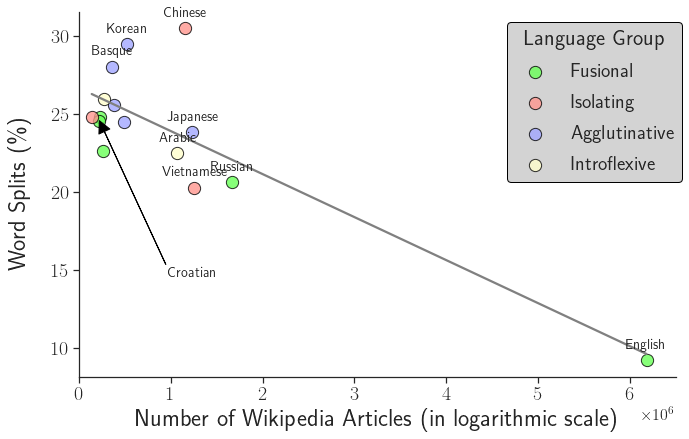

In [156]:
colors = {"Fusional": "#95c78f", 
          "Isolating": "#f79d97", 
          "Agglutinative": "#abaff5", 
          "Introflexive": "#fffecc"}
colors = {k: sns.saturate(v) for k,v in colors.items()}
extra_fontsize = 0

g = sns.lmplot(x="Articles", y="split_word_%", data=split_stats_table, hue="Group", palette=colors,
               fit_reg=False, legend=False, height=6, aspect=1.5, scatter_kws={"s": 150, "edgecolors": "black"})
sns.regplot(x="Articles", y="split_word_%", data=split_stats_table, 
            scatter=False, color="grey", ci=None, order=1)

for i, row in split_stats_table.iterrows():
    if row["Language"] not in ["Thai", "Turkish", "Finnish", "Bulgarian", "Croatian", "Slovak", "Hebrew"]:
        plt.text(row["Articles"], row["split_word_%"] + 0.75, row["Language"], fontsize=14, 
                 horizontalalignment="center")

plt.legend(title="Language Group", title_fontsize=22 + extra_fontsize, loc="upper left", 
           bbox_to_anchor=(0.7, 1), fontsize=20 + extra_fontsize, facecolor="lightgrey", 
           framealpha=1, edgecolor="black", labelspacing=0.6)

row = split_stats_table[split_stats_table["Language"] == "Croatian"]
plt.annotate("Croatian", (row["Articles"],row["split_word_%"]), fontsize=14, xytext=(row["Articles"]+1e6,row["split_word_%"]-10), 
             arrowprops={"width": 0.1, "color": "black"}, horizontalalignment="center")

# plt.ylim((5,35))
plt.xlim((0,6.5e6))
plt.ylabel("Word Splits (\%)", fontsize=24 + extra_fontsize, labelpad=20)
plt.xlabel("Number of Wikipedia Articles (in logarithmic scale)", fontsize=24 +  extra_fontsize)
# plt.title("PoS Average Example Length \n vs Average Performance Over Language", fontsize=28 +  extra_fontsize, pad=30)
plt.tick_params(labelsize=20)

#plt.savefig("../results/plots/.pdf", dpi=400, bbox_inches="tight")
plt.show()
plt.close()

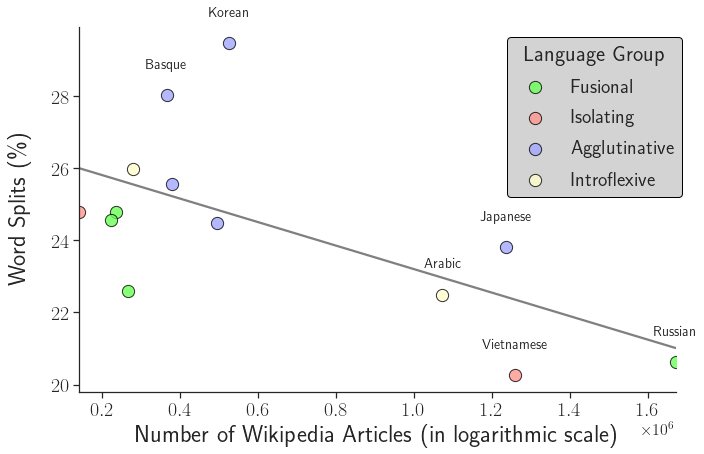

In [141]:
colors = {"Fusional": "#95c78f", 
          "Isolating": "#f79d97", 
          "Agglutinative": "#abaff5", 
          "Introflexive": "#fffecc"}
colors = {k: sns.saturate(v) for k,v in colors.items()}
extra_fontsize = 0

g = sns.lmplot(x="Articles", y="split_word_%", 
               data=split_stats_table[~split_stats_table["Language"].isin(["English", "Chinese"])], 
               hue="Group", palette=colors,
               fit_reg=False, legend=False, height=6, aspect=1.5, scatter_kws={"s": 150, "edgecolors": "black"})
sns.regplot(x="Articles", y="split_word_%", 
            data=split_stats_table[~split_stats_table["Language"].isin(["English", "Chinese"])], 
            scatter=False, color="grey", ci=None)

for i, row in split_stats_table[~split_stats_table["Language"].isin(["English", "Chinese"])].iterrows():
    if row["Language"] not in ["Thai", "Turkish", "Finnish", "Bulgarian", "Croatian", "Slovak", "Hebrew"]:
        plt.text(row["Articles"], row["split_word_%"] + 0.75, row["Language"], fontsize=14, 
                 horizontalalignment="center")

plt.legend(title="Language Group", title_fontsize=22 + extra_fontsize, loc="upper left", 
           bbox_to_anchor=(0.7, 1), fontsize=20 + extra_fontsize, facecolor="lightgrey", 
           framealpha=1, edgecolor="black", labelspacing=0.6)

# plt.ylim((5,35))
# plt.xlim((0,6.5e6))
plt.ylabel("Word Splits (\%)", fontsize=24 + extra_fontsize, labelpad=20)
plt.xlabel("Number of Wikipedia Articles (in logarithmic scale)", fontsize=24 +  extra_fontsize)
# plt.title("PoS Average Example Length \n vs Average Performance Over Language", fontsize=28 +  extra_fontsize, pad=30)
plt.tick_params(labelsize=20)

#plt.savefig("../results/plots/.pdf", dpi=400, bbox_inches="tight")
plt.show()
plt.close()

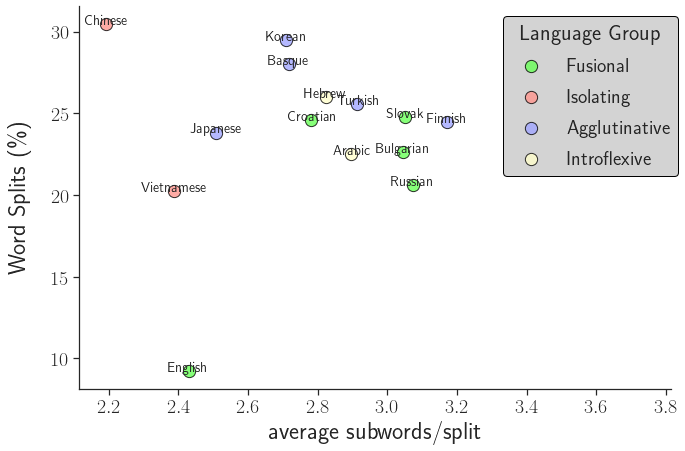

In [31]:
colors = {"Fusional": "#95c78f", 
          "Isolating": "#f79d97", 
          "Agglutinative": "#abaff5", 
          "Introflexive": "#fffecc"}
colors = {k: sns.saturate(v) for k,v in colors.items()}
extra_fontsize = 0

g = sns.lmplot(x="avg_subwords_per_split", y="split_word_%", data=split_stats_table, hue="Group", palette=colors,
               fit_reg=False, legend=False, height=6, aspect=1.5, scatter_kws={"s": 150, "edgecolors": "black"})
# sns.regplot(x="avg_subwords_per_split", y="split_word_%", 
#             data=split_stats_table[~split_stats_table["Language"].isin(["English", "Chinese"])], 
#             scatter=False, color="grey", ci=None, order=1)

for i, row in split_stats_table.iterrows():
    plt.text(row["avg_subwords_per_split"], row["split_word_%"], row["Language"], fontsize=14, 
             horizontalalignment="center")

plt.legend(title="Language Group", title_fontsize=22 + extra_fontsize, loc="upper left", 
           bbox_to_anchor=(0.7, 1), fontsize=20 + extra_fontsize, facecolor="lightgrey", 
           framealpha=1, edgecolor="black", labelspacing=0.6)

# plt.ylim((5,35))
# plt.xlim((5,7))
plt.ylabel("Word Splits (\%)", fontsize=24 + extra_fontsize, labelpad=20)
plt.xlabel("average subwords/split", fontsize=24 +  extra_fontsize)
#plt.title("PoS Word Splits vs Number of Wikipedia Articles", fontsize=28 +  extra_fontsize, pad=30)
plt.tick_params(labelsize=20)

#plt.savefig("../data_exploration/plots/pos_word_splits_vs_wiki.pdf", dpi=400, bbox_inches="tight")
plt.show()
plt.close()

In [32]:
pearsonr(split_stats_table["avg_subwords_per_split"], split_stats_table["split_word_%"])

(0.0878726282391201, 0.755491262435225)

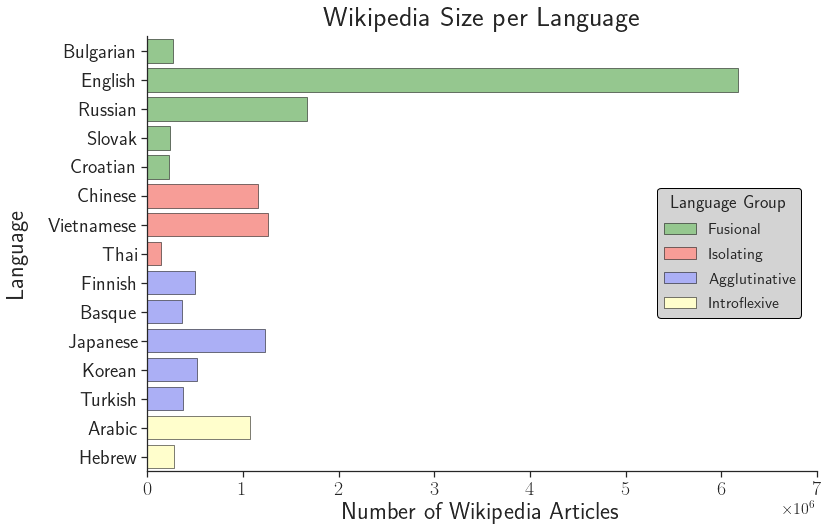

In [22]:
plt.figure(figsize=(12, 8))
colors = ["#95c78f"] * 5 + ["#f79d97"] * 3 + ["#abaff5"] * 5 + ["#fffecc"] * 2

ax = sns.barplot(data=split_stats_table, x="Articles", y="Language", palette=colors, saturation=1, ec="black", linewidth=0.5)

legend_patches = [Patch(facecolor=color, label=label, linewidth=0.5, edgecolor="black") for color, 
                                                                     label in zip(["#95c78f", "#f79d97", "#abaff5", "#fffecc"],
                                                                                  ["Fusional", "Isolating", "Agglutinative", 
                                                                                   "Introflexive"])]
ax.legend(handles=legend_patches, title="Language Group", title_fontsize=18,
          loc="upper left", bbox_to_anchor=(0.75, 0.67), fontsize=16, facecolor="lightgrey", 
          framealpha=1, edgecolor="black", labelspacing=0.6)

plt.xlim((0,7e6))
plt.ylabel("Language", fontsize=24, labelpad=20)
plt.xlabel("Number of Wikipedia Articles", fontsize=24)
plt.title("Wikipedia Size per Language", fontsize=28, pad=10)
plt.tick_params(labelsize=20)

sns.despine(ax=ax)
#ax.figure.savefig("plots/wiki_size.pdf", dpi=400)